In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

import DoubleQ as dQ
import multijoueurs_Q as multiQ

In [8]:
aggregated_agent1 = []
aggregated_agent2 = []
for rep in [[0.025,10**(-6)],[0.1,0.5*10**(-5)],[0.2,10**(-5)],[0.05,1.5*10**(-5)],[0.2,10**(-6)]]:
    total_reward1 = []
    total_reward2 = []
    for loop in range(3):
        print(loop)
        agent1 = dQ.Agent(alpha=rep[0],beta=rep[1])
        agent2 = dQ.Agent(alpha=rep[0],beta=rep[1])
        env = dQ.Env()
    
        temps = []
        reward1 = []
        reward2 = []
        epsilon = []
        prices1 = []
        prices2 = []

        #1) On initialise p0 (on va le faire direct dans agent)
        agent1.p = np.random.choice(agent1.A)
        agent2.p = np.random.choice(agent2.A)
        #Initialisation de l'etat
        #s_t
        s_t = env([agent1.p,agent2.p])[1]
        agent1.s_t = s_t #par rapport à p #ENV car l'aent interract seulement avec l'env et pas l'autre agent
        agent2.s_t = s_t

        s_ind =  agent1.find_index(agent1.S, agent1.s_t) #même indice pour les 2 agents
        agent1.s_ind = s_ind
        agent2.s_ind = s_ind


        #Phase itérative
        for t in range(10**(6)):
        #Action et état t+1
            #a_t
            agent1.a_ind = agent1.get_next_action()
            agent2.a_ind = agent2.get_next_action()
    
            #s_t+1
            s_t1 = env([agent1.A[agent1.a_ind],agent2.A[agent2.a_ind]])[1]
            agent1.s_t1 = s_t1
            agent2.s_t1 = s_t1
    
            s_ind1 = agent1.find_index(agent1.S, agent1.s_t1)
            agent1.s_ind1 = s_ind1 
            agent2.s_ind1 = s_ind1
   
            #Alimenter vecteurs temps et reward
            temps.append(t)
            ret = env(s_t1)
            quant, price, cost = ret
        
            re = ret[0]*ret[1]-ret[0]*ret[2]
            reward1.append(re[0])
            reward2.append(re[1])
            epsilon_value = agent1.epsilon
            epsilon.append(epsilon_value)
            prices1.append(agent1.p)
            prices2.append(agent2.p)
    
    
    
            #Les updates pour le prochain tour 
    
            agent1.updateQ(q=quant[0],
                       p=price[0],
                       c=cost[0],
                       t=t)
            agent2.updateQ(q=quant[1],
                       p=price[1],
                       c=cost[1],
                       t=t)
        
        total_reward1.append(reward1)
        total_reward2.append(reward2)
    aggregated_agent1.append(np.array(total_reward1).mean(axis=0))
    aggregated_agent2.append(np.array(total_reward2).mean(axis=0))

0
1
2
0
1
2
0
1
2
0
1
2
0
1
2


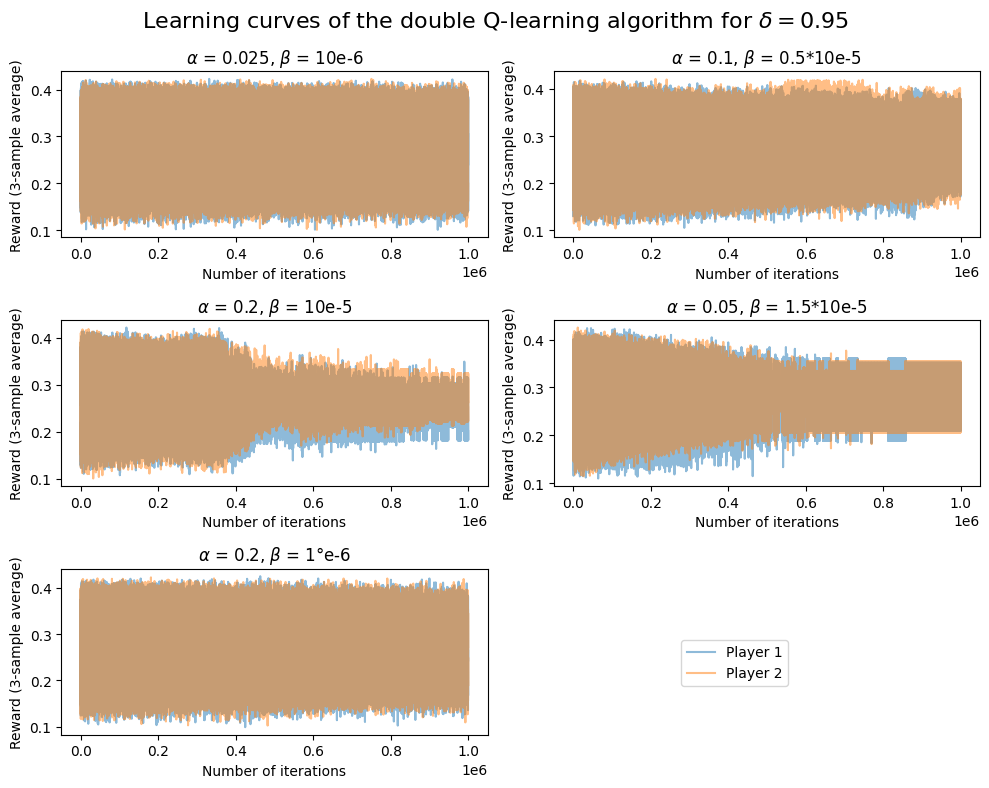

In [9]:
# Créer une figure et des sous-graphiques (3 lignes, 2 colonnes)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

line1, = axes[0, 0].plot(aggregated_agent1[0], alpha=0.5, label = 'Player 1')
line2, = axes[0, 0].plot(aggregated_agent2[0], alpha=0.5, label = 'Player 2')
axes[0, 0].set_title('$\\alpha$ = 0.025, $\\beta$ = 10e-6')

axes[0, 1].plot(aggregated_agent1[1], alpha=0.5, label = 'Player 1')
axes[0, 1].plot(aggregated_agent2[1], alpha=0.5, label = 'Player 2')
axes[0, 1].set_title('$\\alpha$ = 0.1, $\\beta$ = 0.5*10e-5')

axes[1, 0].plot(aggregated_agent1[2], alpha=0.5, label = 'Player 1')
axes[1, 0].plot(aggregated_agent2[2], alpha=0.5, label = 'Player 2')
axes[1, 0].set_title('$\\alpha$ = 0.2, $\\beta$ = 10e-5')

axes[1, 1].plot(aggregated_agent1[3], alpha=0.5, label = 'Player 1')
axes[1, 1].plot(aggregated_agent2[3], alpha=0.5, label = 'Player 2')
axes[1, 1].set_title('$\\alpha$ = 0.05, $\\beta$ = 1.5*10e-5')

axes[2, 0].plot(aggregated_agent1[4], alpha=0.5, label = 'Player 1')
axes[2, 0].plot(aggregated_agent2[4], alpha=0.5, label = 'Player 2')
axes[2, 0].set_title('$\\alpha$ = 0.2, $\\beta$ = 1°e-6')


fig.delaxes(axes[2, 1])

lines = [line1, line2]
labels = ['Player 1', 'Player 2']
fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(0.8,0.2))

# Nommer les axes (identique pour tous les sous-graphiques)
for ax in axes.flat:
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('Reward (3-sample average)')

# Titre général de la figure
fig.suptitle('Learning curves of the double Q-learning algorithm for $\\delta = 0.95$', fontsize=16)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

In [10]:
RN = 0.23
RM = 0.34
Rmean1 = np.zeros(5)
Rmean2 = np.zeros(5)
DRmean1 = np.zeros(5)
DRmean2 = np.zeros(5)
for i in range (len(aggregated_agent1)): 
    Rmean1[i] = aggregated_agent1[i][-100:].mean() 
    Rmean2[i] = aggregated_agent2[i][-100:].mean()
    DRmean1[i] = (Rmean1[i] - RN)/(RM - RN) 
    DRmean2[i] = (Rmean2[i] - RN)/(RM - RN) 
print(DRmean1)
print(DRmean2)

[0.35593227 0.54117032 0.21950622 0.45251184 0.27412144]
[0.46231396 0.48929364 0.33680855 0.45765506 0.27800167]


In [11]:
DRmean12 = [DRmean1,DRmean2]
DRmean = np.mean(DRmean12, axis=0)
print(DRmean)

[0.40912312 0.51523198 0.27815738 0.45508345 0.27606155]


In [7]:
aggregated_agents = []
for met in [True,False]:
    total_rewards = []

    for loop in range(3):
        print("Loop:", loop)
        agents = [multiQ.Agent(doubleQ=met) for _ in range(2)]
        env = multiQ.Env()

        temps = []
        rewards = []
        epsilon = []
        prices = []

        # Initialisation des prix p0 (on va le faire directement dans chaque agent)
        for agent in agents:
            agent.p = np.random.choice(agent.A)

        # Initialisation de l'état
        s_t = env([agent.p for agent in agents])[1]
        for agent in agents:
            agent.s_t = s_t

        s_ind = agents[0].find_index(agents[0].S, agents[0].s_t)
        for agent in agents:
            agent.s_ind = s_ind

        # Phase itérative
        for t in range(10**6):
            # Actions et état t+1
            for agent in agents:
                agent.a_ind = agent.get_next_action()

            s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
            for agent in agents:
                agent.s_t1 = s_t1

            s_ind1 = agents[0].find_index(agents[0].S, agents[0].s_t1)
            for agent in agents:
                agent.s_ind1 = s_ind1

            temps.append(t)
            ret = env(s_t1)
            quant, price, cost = ret

            re = ret[0]*ret[1]-ret[0]*ret[2]
            rewards.append(re)
            epsilon_values = [agent.epsilon for agent in agents]
            epsilon.append(epsilon_values)
            prices.append([agent.p for agent in agents])

            for i, agent in enumerate(agents):
                agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)

        total_rewards.append(rewards)

    aggregated_agents.append(np.array(total_rewards).mean(axis=0))

Loop: 0
Loop: 1
Loop: 2
Loop: 0
Loop: 1
Loop: 2


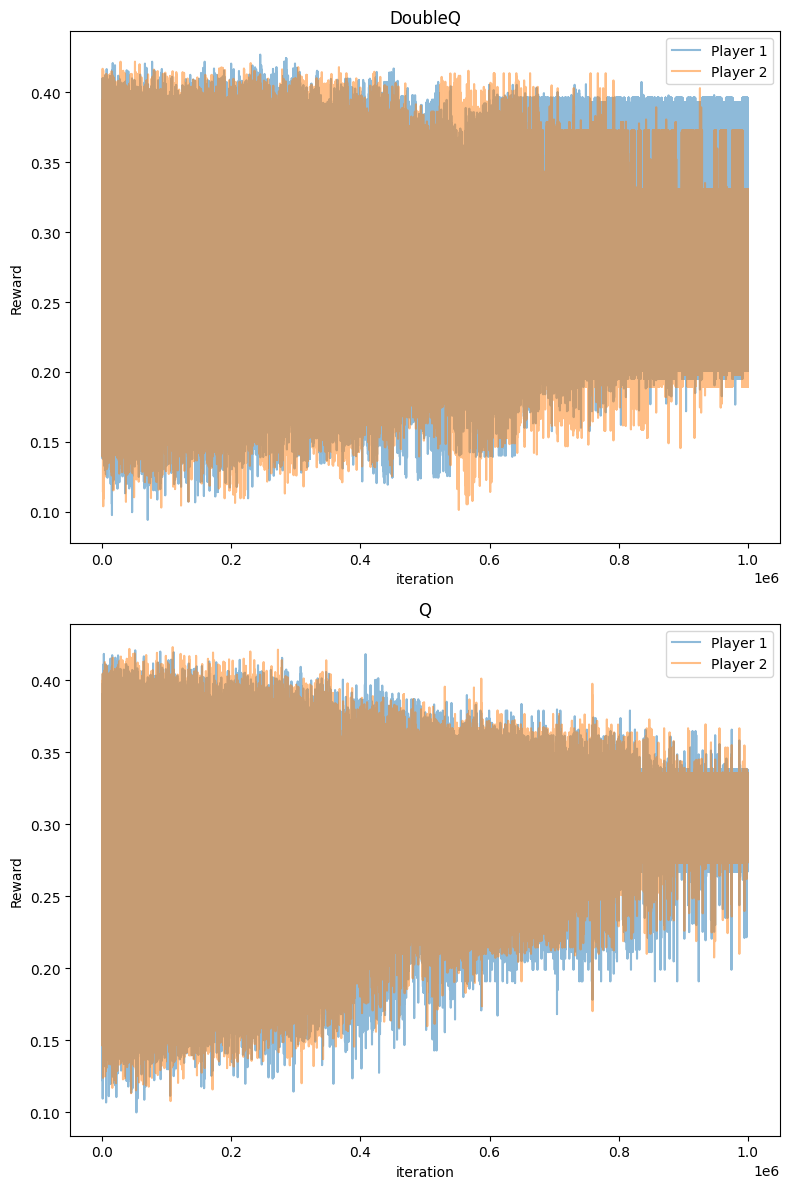

In [9]:
import matplotlib.pyplot as plt
import numpy as np


num_graphs = len(aggregated_agents)
smart_label = ["DoubleQ", "Q"]

# Créer une figure avec autant de sous-graphiques que de périodes
fig, axes = plt.subplots(nrows=num_graphs, figsize=(8, 12))

# Boucle pour itérer à travers les périodes et les sous-graphiques
for graphs in range(num_graphs):
    ax = axes[graphs]
    num_players = len(aggregated_agents[graphs][0])
    # Tracer les courbes pour chaque joueur dans le sous-graphique
    for player in range(num_players):
        ax.plot(aggregated_agents[graphs][:, player], alpha=0.5, label=f'Player {player+1}')
    
    # Titre du sous-graphique avec la période correspondante
    ax.set_title(f'{smart_label[graphs]}')
    
    # Ajouter une légende pour chaque sous-graphique
    ax.legend()
    
    # Nommer les axes du sous-graphique
    ax.set_xlabel('iteration')
    ax.set_ylabel('Reward')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

In [13]:
import resultsPriceandProfits as res
prices = res.PriceOptimizer(nb_players=2)
collusion_profit, collusion_prices = prices.CollusionPrice()
nash_profit, nash_prices = prices.NashPrice()
RN = nash_profit
RC = collusion_profit
    
Rmean = np.zeros((len(aggregated_agents), 2))
DRmean = np.zeros((len(aggregated_agents), 2))   
    
for i in range (len(aggregated_agents)): 
    for j in range (2):
        Rmean[i][j] = aggregated_agents[i][-100:,j].mean()
        DRmean[i][j] = (Rmean[i][j] - RN)/(RC - RN) 

print(RN, RC)
print(Rmean)
print(DRmean)

av = np.mean(DRmean, axis=1)
print(av)

print("Mean $\Delta$ for prices Double Q Learning:", av[0])
print("Mean $\Delta$ for prices Q-learning:", av[1])

0.2216948057185367 0.3374904593213026
[[0.29265259 0.27060235]
 [0.30808364 0.30999213]]
[[0.61278451 0.42236079]
 [0.7460456  0.76252709]]
[0.51757265 0.75428634]
Mean $\Delta$ for prices Double Q Learning: 0.5175726516757311
Mean $\Delta$ for prices Q-learning: 0.7542863420370393
